In [3]:
import ipdb
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.pylab as pylab
import cartopy
from utils import constants as cnst
from eod import msg
from utils import u_grid, u_interpolate as u_int, constants as cnst, u_arrays, u_darrays, u_met, u_statistics, u_plot
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as feature
import cartopy.io.shapereader as shapereader
import pandas as pd
import pickle as pkl
from utils import constants as cnst


coast = shapereader.natural_earth(resolution='110m',
                                  category='physical',
                                  name='coastline')

countries = shapereader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')

pylab.rcParams['figure.figsize'] = (50., 50.)
%matplotlib inline

In [2]:
cd ..

/home/ck/pythonWorkspace/proj_CEH


In [55]:
msgopen = pd.read_csv('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/ERA5/core_txt/cores_gt15000km2_table_AMSRE_LSTA_tracking_SMcircle_2hOverlap_17.csv', na_values=-999)

##  Wet / Dry case comparison

Wet: Day 0 / Day -1 > + 0.01% SM anomaly mean (more like 'neutral & wet condition')

Dry: Day  0 < -3% , Day-1 < -1.5% SM anomaly mean

Identified in box + - 90 km and 200km upstream from core centre

In [56]:
msgopen.shape

(19454, 25)

In [57]:
print('Number of ALL cases:', msgopen.shape[0])

Number of ALL cases: 19454


In [58]:
#dry = msgopen[(msgopen['SMmean0']<-3)& (msgopen['SMmean-1'] <-1.5) &(msgopen['SMmean0']>-900)& (msgopen['SMmean-1'] >-900) ]
msgopen = msgopen[(msgopen['lat']>9) & (msgopen['lat']<19) & (msgopen['topo']<450) & (msgopen['ERAqmean']>14.7) & (msgopen['ERAqmean']<16)]##  & (msgopen['ERAqmean']>14.8) & (msgopen['ERAqmean']<16.5)]
dry = msgopen[(msgopen['dtime'] <= 2) & (msgopen['SMmean0'] < -6) & (msgopen['SMmean-1'] < -3.3) & (msgopen['LSTAslotfrac'] >= 0.03)]

In [59]:
wet = msgopen[(msgopen['dtime'] <= 2) & (msgopen['SMmean0']>0.05) & (msgopen['SMmean-1']>0.8) & (msgopen['LSTAslotfrac'] >= 0.03) ]#msgopen[(msgopen['SMmean0']>0.01)& (msgopen['SMmean-1'] >0.01)]

In [60]:
print(len(dry))
print(len(wet))

228
228


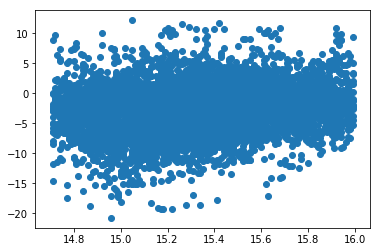

In [61]:
plt.figure()
plt.scatter(msgopen['ERAqmean'], msgopen['SMmean0'])
plt.axhline(0, xmin=6, xmax=16, color='k')

In [62]:
dry.head()

,id,year,month,day,hour,lon,lat,xloc,yloc,area,...,SMdry0,SMwet0,SMmean-1,SMdry-1,SMwet-1,LSTAmean,LSTAslotfrac,dtime,ERAqmean,SMscale
517,517,2006,6,28,17,0.869540,10.367043,639,235,35775,...,1.0,0.0,-7.766056,1.000000,0.000000,3.161305,0.995005,0.0,15.27,24.0
518,518,2006,6,28,17,0.689877,10.544875,632,241,35775,...,1.0,0.0,-7.963693,1.000000,0.000000,3.687608,0.996582,0.0,15.30,24.0
519,519,2006,6,28,17,1.408530,10.900223,658,254,35775,...,1.0,0.0,-7.581216,1.000000,0.000000,2.744523,0.999351,1.0,15.37,24.0
520,520,2006,6,28,17,2.037350,11.432437,681,273,35775,...,1.0,0.0,-5.397137,0.976276,0.009655,3.272768,0.994805,2.0,15.41,24.0
521,521,2006,6,28,17,2.217013,11.698167,687,282,35775,...,1.0,0.0,-4.452505,0.898207,0.076966,4.063855,0.988961,0.0,15.36,45.0


In [63]:
print('Number of dry cases:', dry.shape[0])

Number of dry cases: 228


In [64]:
wet.keys()

Index(['id', 'year', 'month', 'day', 'hour', 'lon', 'lat', 'xloc', 'yloc',
       'area', 'csize', 't', 'storm_id', 'topo', 'SMmean0', 'SMdry0', 'SMwet0',
       'SMmean-1', 'SMdry-1', 'SMwet-1', 'LSTAmean', 'LSTAslotfrac', 'dtime',
       'ERAqmean', 'SMscale'],
      dtype='object')

In [65]:
print('Number of wet cases:', wet.shape[0])

Number of wet cases: 228


### The dry case shows a shift in the core temperature distribution by -2K

Text(0.5,1,'Core frequency binned by core centre temperature')

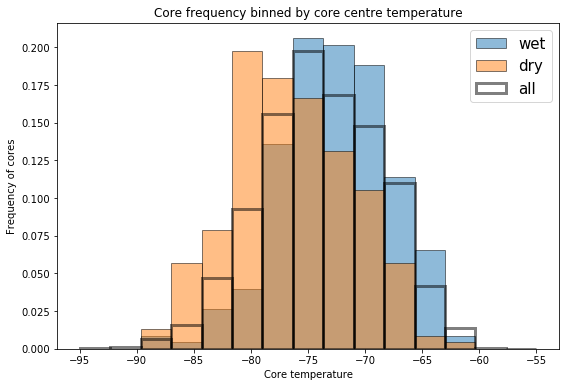

In [66]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.t, alpha=0.5, label='wet', edgecolor='k', bins=15, range=(-95,-55))
u_plot.hist_freq(ax, dry.t, alpha=0.5, label='dry', edgecolor='k', bins=15, range=(-95,-55))
u_plot.hist_freq(ax, msgopen.t, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=15, range=(-95,-55), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Core temperature')
plt.title('Core frequency binned by core centre temperature')
#plt.savefig('/home/ck/DIR/cornkle/figs/LSTA/corrected_LSTA/new/coreT_GT14LT16_Q.png')

(array([147., 401., 224.,   0., 161.,   0.,   0., 118.,   0.,   0.,  94.,
          0.,   0.,   0.,   0.,  84.,   0.,   0.,   0.]),
 array([ 28.        ,  39.68421053,  51.36842105,  63.05263158,
         74.73684211,  86.42105263,  98.10526316, 109.78947368,
        121.47368421, 133.15789474, 144.84210526, 156.52631579,
        168.21052632, 179.89473684, 191.57894737, 203.26315789,
        214.94736842, 226.63157895, 238.31578947, 250.        ]),
 <a list of 19 Patch objects>)

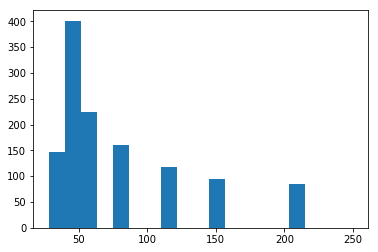

In [67]:
plt.hist(msgopen.SMscale[msgopen.SMscale!=0], bins=np.linspace(28,250,20))

In [48]:
np.percentile(msgopen.SMscale[msgopen.SMscale>=25], np.linspace(0,100,10))

array([ 33.,  33.,  45.,  45.,  61.,  61.,  84., 114., 156., 543.])

In [60]:
np.percentile(msgopen.t, 10)

-80.99890845163682

In [61]:
np.sum(wet.t<-81.389)/wet.t.size

0.052941176470588235

In [62]:
np.sum(dry.t<-81.389)/wet.t.size

0.17647058823529413

In [63]:
print('Core mean temperature DRY: ', np.mean(np.mean(dry.t)))
print('Core mean temperature WET: ', np.mean(np.mean(wet.t)))

Core mean temperature DRY:  -75.96148883211391
Core mean temperature WET:  -73.17101732375546


In [64]:
print('Core mean temperature DRY: ', np.mean(np.percentile(dry.t,10)))
print('Core mean temperature WET: ', np.mean(np.percentile(wet.t,10)))

Core mean temperature DRY:  -82.13904552956853
Core mean temperature WET:  -79.19026194060332


### We get very few wet cases in June 

Text(0.5,1,'Core frequency binned by month')

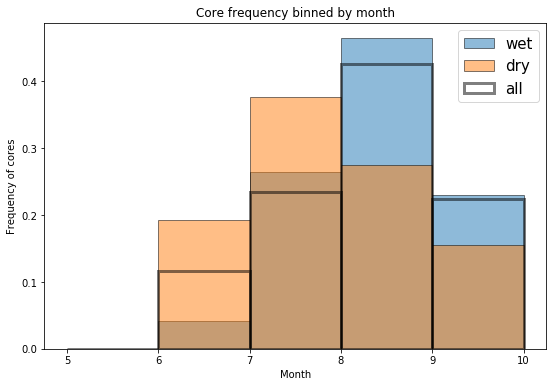

In [65]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.month, alpha=0.5, label='wet', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, dry.month, alpha=0.5, label='dry', edgecolor='k', bins=5, range=(5,10))
u_plot.hist_freq(ax, msgopen.month, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=5, range=(5,10), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Month')
plt.title('Core frequency binned by month')

### The dry cases tend to occur further south - as expected from main occurence during June/July
### The wet case doesn't show such a preference

Text(0.5,1,'Core frequency binned by latitude')

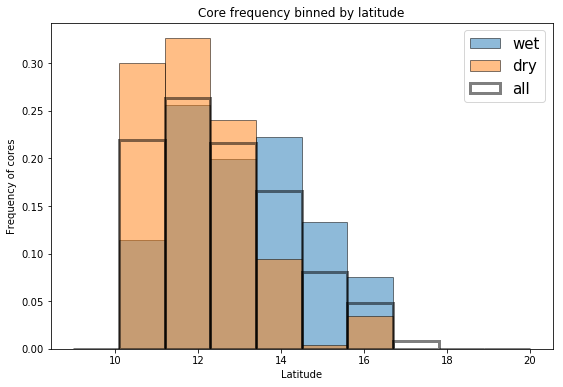

In [46]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.lat, alpha=0.5, label='wet', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, dry.lat, alpha=0.5, label='dry', edgecolor='k', bins=10, range=(9,20))
u_plot.hist_freq(ax, msgopen.lat, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(9,20), facecolor='None')
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Latitude')
plt.title('Core frequency binned by latitude')

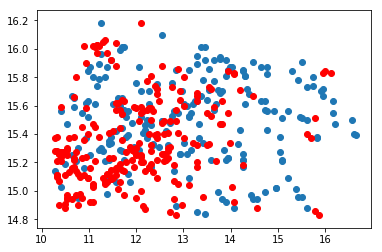

In [49]:
plt.scatter(wet.lat,wet.ERAqmean)
plt.scatter(dry.lat, dry.ERAqmean, color='r')

In [144]:
topo = xr.open_dataarray(cnst.network_data + 'data/ancils_python/lsta_corr_topo.nc')
topo = topo.sel(lat=slice(9,16))
h = topo.mean(dim='lat')

### Overall core frequency follows topography. Would have to look into dry-core case around 5W

Text(0.5,1,'Core frequency binned by longitude')

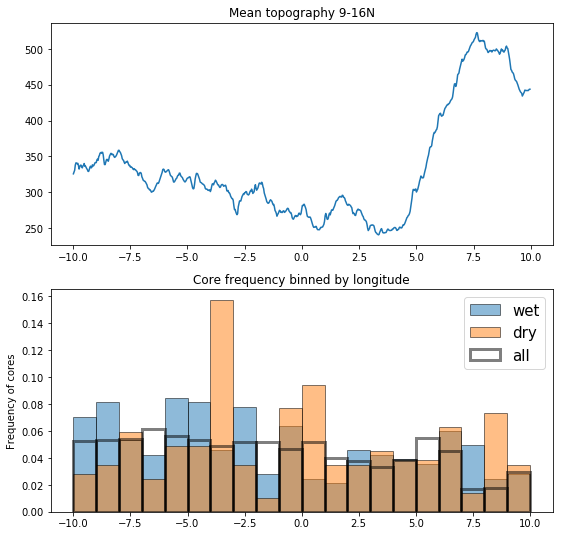

In [145]:
f= plt.figure(figsize=(9,9))

ax = f.add_subplot(211)
ax.plot(h.lon,h)
plt.title('Mean topography 9-16N')

ax = f.add_subplot(212)
u_plot.hist_freq(ax, wet.lon, alpha=0.5, label='wet', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, dry.lon, alpha=0.5, label='dry', edgecolor='k', bins=20, range=(-10,10))
u_plot.hist_freq(ax, msgopen.lon, alpha=0.5, label='all', edgecolor='k', linewidth=3,  bins=20, range=(-10,10), facecolor='None')
plt.legend(fontsize=15)
#ax.plot(h.lon, h)
plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.title('Core frequency binned by longitude')

### Atmospheric conditions associated with the dry case favour shear and therefore organisation into bigger storms? 

Text(0.5,1,'Core frequency binned by storm area')

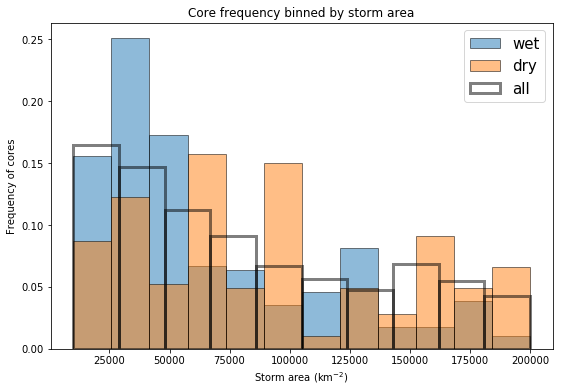

In [146]:
f= plt.figure(figsize=(9,6))
ax = f.add_subplot(111)
u_plot.hist_freq(ax, wet.area, alpha=0.5, label='wet', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, dry.area, alpha=0.5, label='dry', edgecolor='k', bins=12, range=(10000,200000))
u_plot.hist_freq(ax, msgopen.area, alpha=0.5, label='all', edgecolor='k', linewidth=3, bins=10, range=(10000,200000), facecolor='None')

plt.legend(fontsize=15)
plt.ylabel('Frequency of cores')
plt.xlabel('Storm area (km$^{-2}$)')
plt.title('Core frequency binned by storm area')

In [94]:
np.mean(wet.area)

75118.12749003984

In [95]:
np.mean(dry.area)

118019.9806949807

In [96]:
(np.mean(dry.area) - np.mean(wet.area)) / np.mean(wet.area)

0.5711251682974838

In [ ]:
plt.scatter